# Eje 4 - Generador Pseudoaleatorio Uniforme

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kstest,uniform

In [ ]:
def glc(n, seed, a, c, m):
    x = seed
    sequence = []
    for _ in range(n):
        x = (a * x + c) % m
        sequence.append(x / m)
    return sequence

def plot_distribution(sample, N, title):
    sorted_sample = np.sort(sample)
    cdf_empirical = np.arange(1, N+1) / N  # Valores acumulados para la CDF empírica

    # Crear una línea de referencia para la CDF teórica de la distribución uniforme
    x = np.linspace(0, 1, 1000)
    cdf_theoretical = uniform.cdf(x)

    # Graficar ambas CDFs
    plt.figure(figsize=(10, 6))
    plt.step(sorted_sample, cdf_empirical, where='post', color='skyblue', label='CDF Empírica (GLC)')
    plt.plot(x, cdf_theoretical, color='darkblue', lw=2, label='CDF Teórica (Uniforme)')
    plt.title(title)
    plt.xlabel("Valor")
    plt.ylabel("Probabilidad Acumulada")
    plt.legend()
    plt.show()

Conjunto de parámetros 1:
a = 166452, c = 65874125, m = 3659852142
KS Statistic: 0.017123142157254856, p-value: 0.9261575974945433



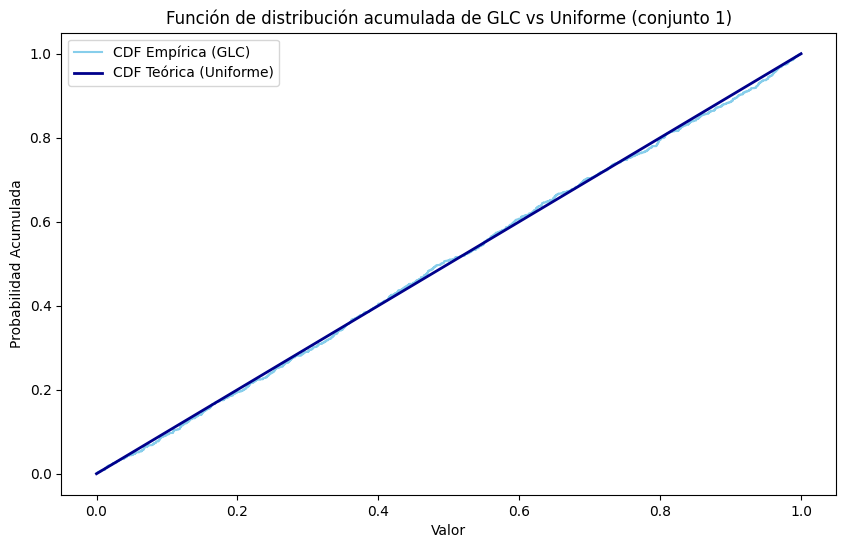

Conjunto de parámetros 2:
a = 96845, c = 12345, m = 2147483648
KS Statistic: 0.02942609198763968, p-value: 0.3452687984802517



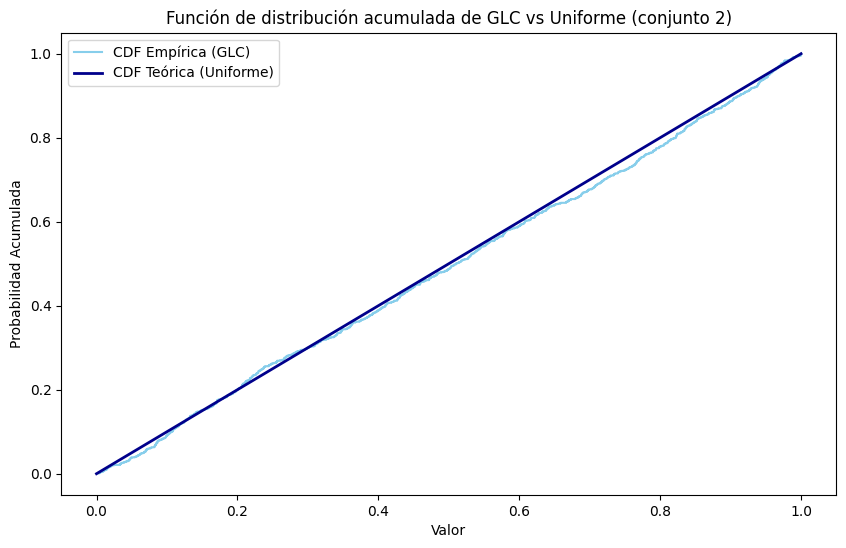

Conjunto de parámetros 3:
a = 875421, c = 1, m = 500
KS Statistic: 0.0020000000000000018, p-value: 1.0



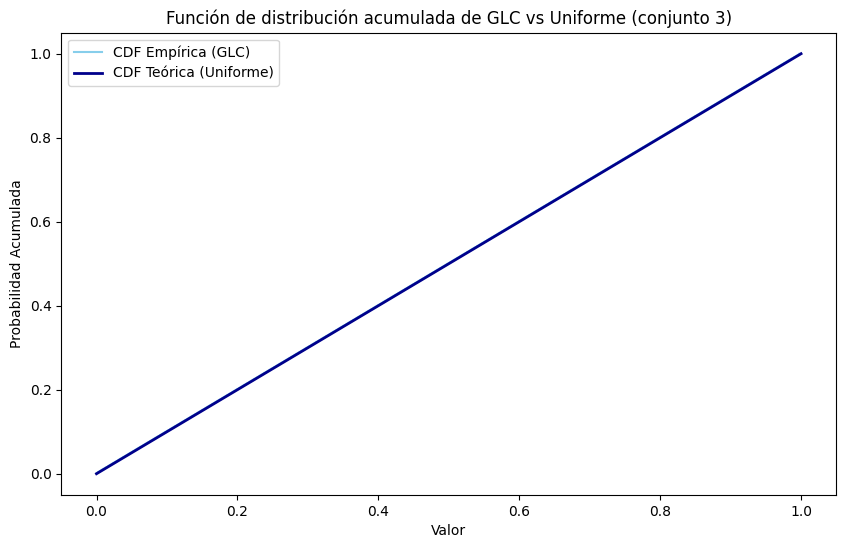

Conjunto de parámetros 4:
a = 96, c = 12345, m = 2147483648
KS Statistic: 0.6802105868272483, p-value: 0.0



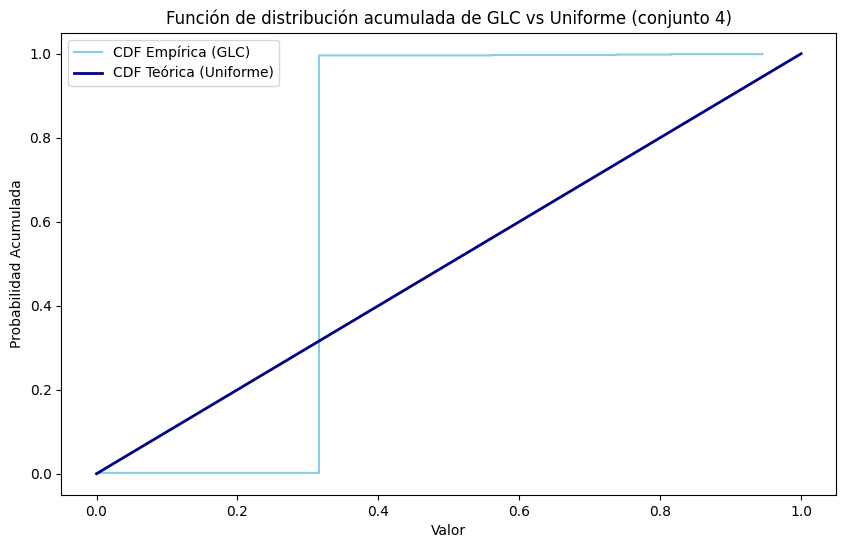

In [42]:
N = 1000  # Tamaño de la muestra
seed = 1234

# conjuntos de parámetros diferentes
params = [
    (166452, 65874125, 3659852142), # (a,c,m)
    (96845, 12345, 2**31),
    (875421, 1, 500),
    (96, 12345, 2**31),
]

# Generar y probar cada conjunto de parámetros
for i, (a, c, m) in enumerate(params):
    sample = glc(N, seed, a, c, m)
    
    # Comparar con distribución uniforme teórica con prueba ks
    ks_stat, p_value = kstest(sample, 'uniform')
    print(f"Conjunto de parámetros {i+1}:")
    print(f"a = {a}, c = {c}, m = {m}")
    print(f"KS Statistic: {ks_stat}, p-value: {p_value}\n")

    plot_distribution(sample, N, f"Función de distribución acumulada de GLC vs Uniforme (conjunto {i+1})") 
